In [85]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the modelimport numpy as np

In [11]:
import pandas as pd

In [12]:
df=pd.read_csv("/content/placement.csv")

In [13]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


01. Preprocess + EDA + Feature selection

In [14]:
#Filter unwanted columns here (like first col)
df=df.iloc[:,1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [15]:
df.shape

(100, 3)

In [16]:
import matplotlib.pyplot as plt

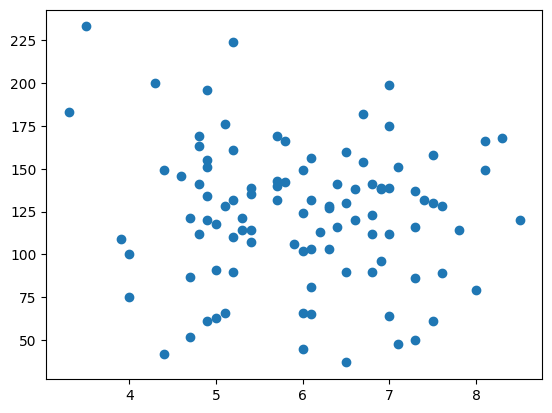

In [17]:
plt.scatter(df['cgpa'],df['iq'])

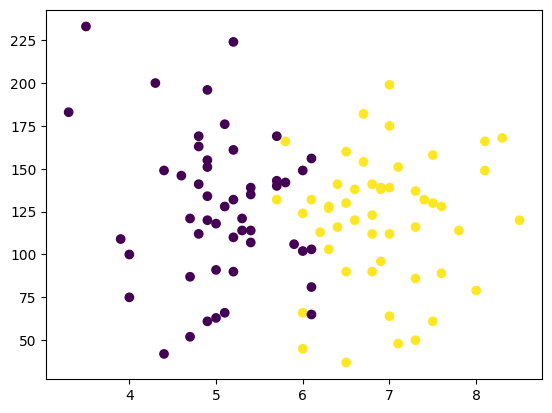

In [18]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])


01.Extract Input and Output data

In [19]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [20]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [21]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [22]:
x.shape


(100, 2)

In [23]:
y.shape


(100,)

02. Train test split

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [48]:
x_train


,cgpa,iq
1,5.9,106.0
74,6.7,154.0
88,4.4,149.0
87,5.7,132.0
45,6.0,66.0
...,...,...
79,6.5,90.0
89,4.9,151.0
24,4.7,121.0
17,3.3,183.0


In [61]:
y_train

,placement
1,0
74,1
88,0
87,1
45,1
...,...
79,1
89,0
24,0
17,0


In [27]:
x_test


,cgpa,iq
10,6.0,45.0
68,4.0,75.0
5,7.1,48.0
67,5.0,118.0
66,6.9,96.0
38,6.5,160.0
45,6.0,66.0
19,5.2,132.0
47,5.2,161.0
69,8.5,120.0


In [28]:
y_test

,placement
10,1
68,0
5,1
67,0
66,1
38,1
45,1
19,0
47,0
69,1


03. Scale the values (To reduce the distances)

In [65]:
#To make all values between -1 and 1
from sklearn.preprocessing import StandardScaler

In [66]:
scaler=StandardScaler()

In [67]:
x_train=scaler.fit_transform(x_train)

In [68]:
x_train

array([[-0.1155182 , -0.40528719],
       [ 0.57759098,  0.77135305],
       [-1.41509791,  0.64878636],
       [-0.28879549,  0.2320596 ],
       [-0.02887955, -1.38582073],
       [-0.98190467, -1.50838742],
       [ 1.35733881, -0.82201395],
       [-0.02887955, -0.50334055],
       [ 1.5306161 , -0.20918049],
       [ 0.83750692,  0.40365297],
       [-0.98190467,  0.79586639],
       [ 0.0577591 ,  0.82037972],
       [ 0.23103639,  0.10949291],
       [-0.72198873,  2.48728674],
       [-0.02887955,  0.0359529 ],
       [ 0.14439775, -0.23369383],
       [ 0.23103639,  0.13400625],
       [ 0.49095233,  0.37913963],
       [-1.7616525 , -1.16520069],
       [-1.50173655,  1.89896661],
       [ 0.40431369, -2.09670754],
       [-0.80862738,  1.31064649],
       [-0.72198873,  0.2320596 ],
       [ 0.23103639, -0.47882721],
       [-0.98190467, -0.06210046],
       [-0.54871143,  0.40365297],
       [ 0.83750692, -1.43484741],
       [ 1.7038934 , -1.06714733],
       [-0.80862738,

In [69]:
x_test=scaler.transform(x_test)

In [70]:
x_test

array([[ 0.66422963,  0.45267965],
       [-0.54871143,  0.30559962],
       [-0.80862738,  0.13400625],
       [ 0.75086828,  0.37913963],
       [ 0.83750692, -0.25820716],
       [-0.28879549,  0.42816631],
       [-1.15518196, -0.87104062],
       [-1.06854332,  0.45267965],
       [-0.98190467,  1.80091326],
       [-1.06854332, -0.25820716]])

**04. Train the Model**

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
clf=LogisticRegression()

In [73]:

clf.fit(x_train,y_train)

LogisticRegression()

05. Model Evaluation

In [74]:
#Model Evaluation

In [75]:
y_pred=clf.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [76]:
y_test

,placement
43,1
49,0
86,0
11,1
29,1
36,0
23,0
51,0
80,0
59,0


In [77]:
from sklearn.metrics import accuracy_score

In [78]:
accuracy_score(y_test,y_pred)

1.0

In [79]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

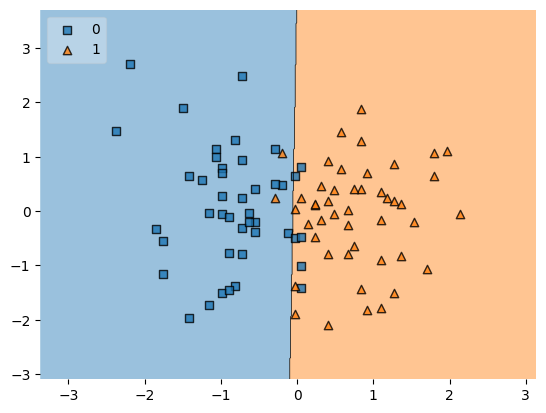

In [80]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

For Interface

In [81]:
import pickle


In [84]:
pickle.dump(clf,open('model.pkl','wb'))